<a href="https://colab.research.google.com/github/mimraan547/CNN/blob/main/Titanic%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the packages 
import numpy as np,pandas as pd,sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#To check the count of  missing values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print("No of passengers travelling in ship or in original data:"+str(len(titanic_data)))

No of passengers travelling in ship or in original data:891


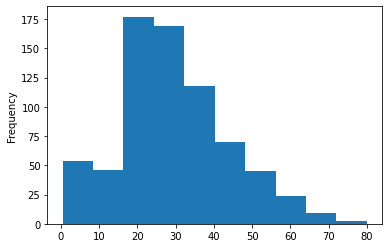

In [6]:
#Data Visualization 
import matplotlib.pyplot as plt,seaborn as sns
titanic_data["Age"].plot.hist()
plt.show()

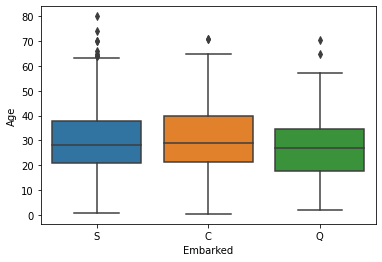

In [7]:
sns.boxplot(x="Embarked",y="Age",data=titanic_data)
plt.show()

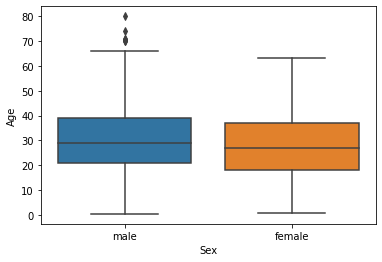

In [8]:
sns.boxplot(x="Sex",y="Age",data=titanic_data)
plt.show()

In [9]:
#drop the major missing values
titanic_data.drop("Cabin",axis=1,inplace=True)

In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
#Fill the values of Age column
titanic_data["Age"].fillna((titanic_data["Age"].mean()),inplace=True)

In [12]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
#To drop all null values
titanic_data.dropna(inplace=True)

In [14]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [16]:
#To create dummies
sex = pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
Pcl = pd.get_dummies(titanic_data["Pclass"],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [18]:
embark = pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
titanic_data = pd.concat([titanic_data,sex,Pcl,embark],axis=1)
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


In [20]:
#Drop the unnecessary columns
titanic_data.drop(['Sex','Embarked','Pclass','Name','Ticket','PassengerId'],
                  axis=1,inplace =True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [21]:
#Training and Testing data
X = titanic_data.drop('Survived',axis=1)
y = titanic_data["Survived"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#random state is basically used for reproducing your problem every time
a,b = np.arange(10).reshape(5,2),range(5)
b

range(0, 5)

In [24]:
train_test_split(a,b)

[array([[0, 1],
        [2, 3],
        [6, 7]]), array([[8, 9],
        [4, 5]]), [0, 1, 3], [4, 2]]

In [25]:
train_test_split(a,b)

[array([[4, 5],
        [8, 9],
        [0, 1]]), array([[2, 3],
        [6, 7]]), [2, 4, 0], [1, 3]]

In [26]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [27]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [28]:
#Splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) #Estimators 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#predictors
predictions = logmodel.predict(X_test)

In [30]:
#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,predictions)*100)

83.14606741573034


In [31]:
print(confusion_matrix(y_test,predictions))

[[144  22]
 [ 23  78]]


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       166
           1       0.78      0.77      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [33]:
predictions = logmodel.predict([[22.0,1,0,7.2500,1,0,1,0,1]])
predictions

array([0])

In [34]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify
app = Flask(__name__)
run_with_ngrok(app) #starts ngrok when app is running
@app.route("/<float:Age>/<int:SibSp>/<int:Parch>/<float:Fare>/<Gender>/<int:Pclass>/<Place>")
def home(Age,SibSp,Parch,Fare,Gender,Pclass,Place):
  p = []
  p +=[Age,SibSp,Parch,Fare]
  if Gender.casefold() == "m":
    p+=[1]
  else:
    p+=[0]
  if Pclass == 2:
    p+=[1,0]
  elif Pclass == 3:
    p+=[0,1]
  else:
    p+=[0,0]
  if Place.casefold() == "queenstown":
    p+=[1,0]
  elif Place.casefold() == "southampton":
    p+=[0,1]
  else:
    p+=[0,0]
  arr = np.array([p])
  predict = logmodel.predict(arr)
  if predict == [1]:
    result = {'result':'Survived'}
  else:
    result = {'result':'Not Survived'}
  return jsonify(result)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://763b3b1d4b23.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [17/Jun/2021 17:37:36] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2021 17:37:37] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2021 17:37:39] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [17/Jun/2021 17:39:11] "GET / HTTP/1.1" 404 -
